In [283]:
include("../packages.jl")
include("../functions.jl")



σ_one_slowD_dep! (generic function with 1 method)

# From decisions to events

Categorical representations are associated with the emergence of working memory as we saw in the simple model
$$
\tau \dot x(t) = -x(t) + \tanh(k\cdot x(t) + I(t)) + \sigma\cdot n(t)
$$

## Stuck in a decision

In [284]:
Tfinal=20.
tspan=(0,Tfinal)

x0=[0.0]


I(t)=0.1*sin(1*t)*(t<9)

τ=0.005
σ=0.0005/τ
k=1.25

p=(τ,k,I,σ)
prob=SDEProblem(basic_1D!,σ_basic_1D!,x0,tspan,p)
sol=solve(prob,EM(),dt=1e-5,saveat=0.01);



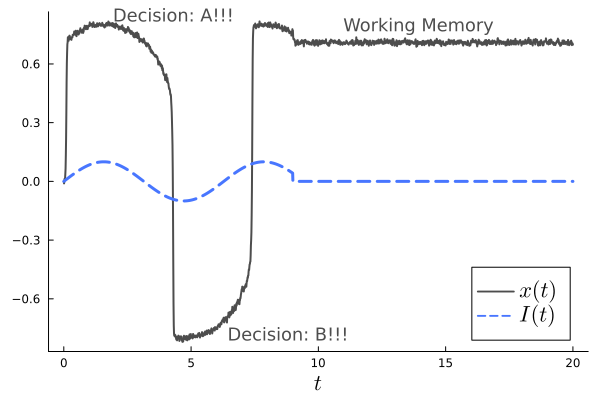

In [285]:
gr(legendfontsize=15,labelfontsize=15)

plot(sol.t,sol[1,:],lw=2,lc=:gray30,label=L"x(t)")
plot!(sol.t,I.(sol.t),lw=3,lc=:royalblue1,label=L"I(t)",ls=:dash)
annotate!(2., 0.85, text("Decision: A!!!", :gray30, :left, 12))
annotate!(6.5, -0.78, text("Decision: B!!!", :gray30, :left, 12))
annotate!(11, 0.8, text("Working Memory", :gray30, :left, 12))

plot!(grid=false,xlabel=L"t",legend=:bottomright)



In [286]:
savefig("basic_WM.pdf")

## A flexible signal-detection (one category + neutral) model

Let's use this model (with $k>1$ to ensure categorical representation) as a tunable detector of large enough positive inputs.

Let $\pm I_{SN}$, $I_{SN}>0$, be the input values at which the saddle-node bifurcations happen in the $\{(I,x)\}$-bifurcation diagram. Let $-I_{SN}<I_0<I_{SN}$ be a constant bias input and let $x_0$ be the lower stable equilibrium for $I=I_0$.

We obtain a tunable detector of large enough positive inputs by letting 
$$
\tau \dot x(t) = -x(t) + \tanh(k\cdot x(t) + I_0 + I(t)) + \sigma\cdot n(t),\quad x(0)\approx x_0
$$
Hence, when the input $I(t)$ crosses an implicitly defined threshold $I_{th}=I_{SN}-I_0$ the state switches to the up state: a sufficiently large input was detected! The parameter $I_0$ serves to shift the implicit threshold.

**Remark:** The input $I(t)$ can be the output of a filter with (possibly MISO) transfer function $F(s)$ that pre-processes the actual input to the agent. The transfer function $F(s)$ is called a ``receptive field''.



In [287]:
Tfinal=5.
tspan=(0,Tfinal)

x0=[-0.65]

τ=0.01
σ=0*0.001/τ
k=1.25


I0=0.05
I1(t)=0.033*pulse(t,2.,2.5)
Iin1(t)=I0+I1(t)

p=(τ,k,Iin1,σ)
prob=SDEProblem(basic_1D!,σ_basic_1D!,x0,tspan,p)
sol1=solve(prob,EM(),dt=1e-5,saveat=0.001);


I0=0.05
#I2(t)=0.02*pulse(t,2.,2.5)
I2(t)=0.033*pulse(t,2.,2.2)
Iin2(t)=I0+I2(t)

p=(τ,k,Iin2,σ)
prob=SDEProblem(basic_1D!,σ_basic_1D!,x0,tspan,p)
sol2=solve(prob,EM(),dt=1e-5,saveat=0.001);


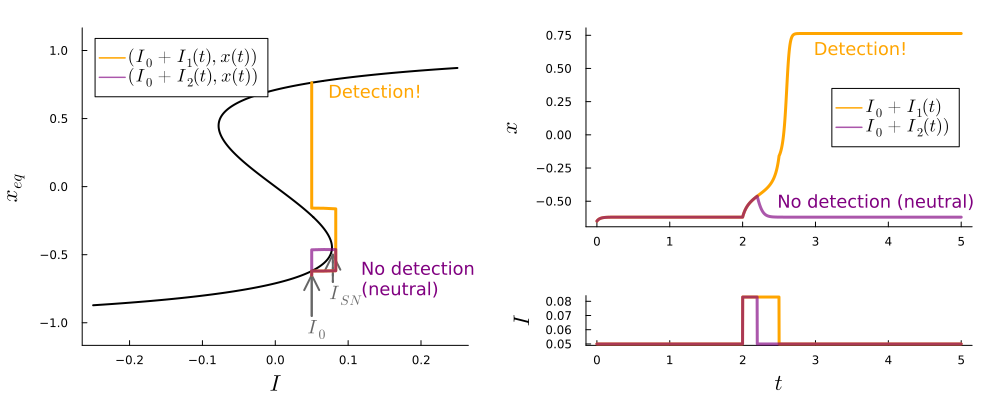

In [288]:
gr(legendfontsize=12,labelfontsize=15)

k=1.25

Ivec=range(-0.25,0.25,length=1000)
xvec=range(-1.1,1.1,length=1000)

x_null_I(I,x) = -x+S(k*x+I)

p1=contour(Ivec,xvec,x_null_I,levels=[0],lc=:black,lw=2)
plot!(grid=false,colorbar=false,xlabel=L"I",ylabel=L"x_{eq}")
plot!([0.079;0.079],[-0.7;-0.5],arrow=:true,lc=:gray40,lw=2.0,ls=:dash,label=false)
annotate!(0.075, -0.8, text(L"I_{SN}", :gray40, :left, 13))
plot!([0.05;0.05],[-0.95;-0.65],arrow=:true,lc=:gray40,lw=2.0,label=false)
annotate!(0.045, -1.05, text(L"I_{0}", :gray40, :left, 13))
annotate!(0.12, -0.6, text("No detection", :purple, :left, 12))
annotate!(0.12, -0.75, text("(neutral)", :purple, :left, 12))
annotate!(0.075, 0.7, text("Detection!", :orange, :left, 12))

plot!(Iin1.(sol1.t),sol1[1,:],label=L"(I_0+I_1(t),x(t))",lw=3,lc=:orange)
plot!(Iin2.(sol1.t),sol2[1,:],label=L"(I_0+I_2(t),x(t))",legend=:topleft,lw=3,lc=:purple,alpha=0.66)
#plot!(I.(sol3.t[100:end]),sol3[1,100:end],color=:gray40,lw=3,alpha=0.75,label=L"(I(t),x(t))")

p2=plot(sol1.t,sol1[1,:],lw=3,lc=:orange,label=L"I_0+I_1(t)")
plot!(sol2.t,sol2[1,:],lw=3,lc=:purple,label=L"I_0+I_2(t))",alpha=0.66)
plot!(xlabel="",ylabel=L"x",grid=false,legend=:right)
annotate!(2.5, -0.5, text("No detection (neutral)", :purple, :left, 12))
annotate!(3, 0.65, text("Detection!", :orange, :left, 12))

p3=plot(sol1.t,Iin1.(sol1.t),lw=3,lc=:orange,label=L"I_0+I_1(t)")
plot!(sol2.t,Iin2.(sol2.t),lw=3,lc=:purple,label=L"I_0+I_2(t)",alpha=0.66)
plot!(xlabel=L"t",ylabel=L"I",grid=false,legend=false)

l= @layout[
    a{0.8h}
    b{0.2h}
]

p4=plot(p2,p3,layout=l)

p5=plot(p1,p4,layout=(1,2),size=(1000,400),margin=20px)


In [289]:
savefig("sig_det.pdf")

## Resetting the decision through slow negative feedback: one-option excitable dynamics.

If we want our system to forget its decision after a while, i.e., after the decision representation is used for some cognitive process or if it is not used, we can achieve it through **slow negative feedback**. The effect of slow negative feedback is to bring the state back to a neutral or nominal state. The **decision becomes an event**, which happens at a given time and lasts a finite amount of time.

Adding a slow negative feedback variable, we obtain dynamics
\begin{align*}
    \tau \dot x(t) &= -x(t) + \tanh(k\cdot x(t) + \bar I_0 + I(t) - x_s(t)) + \sigma\cdot n(t),\quad x(0)\approx x_0\\
        \dot x_s(t)&= \varepsilon(x(t)-x_s(t))
\end{align*}
where $0<\varepsilon\ll 1$
To ensure that $(x,x_s)=(x_0,x_0)$ is an equilibrium for $I(t)=0$ and for a desired threshold shift $I_0$, we let $\bar I_0=I_0+x_0$. In this way

The resulting dynamics is a **one-option (stimulus detected!) excitable dynamics**.

In [290]:
Tfinal=10.
tspan=(0,Tfinal)

x0=[-0.625,-0.625]

τ=0.01
σ=0*0.001/τ
k=1.25
ε=0.05


I0=0.05
barI0 = I0 + x0[1]
I1(t)=0.04*pulse(t,2.,2.5)
Iin1(t)=barI0+I1(t)

p=(τ,Iin1,σ,k,ε)
prob=SDEProblem(basic_1D_exc_1o!,σ_basic_1D_exc_1o!,x0,tspan,p)
sol1=solve(prob,EM(),dt=1e-5,saveat=0.001);


#I2(t)=0.03*pulse(t,2.,2.5)
I2(t)=0.04*pulse(t,2.,2.2)
Iin2(t)=barI0+I2(t)

p=(τ,Iin2,σ,k,ε)
prob=SDEProblem(basic_1D_exc_1o!,σ_basic_1D_exc_1o!,x0,tspan,p)
sol2=solve(prob,EM(),dt=1e-5,saveat=0.001);

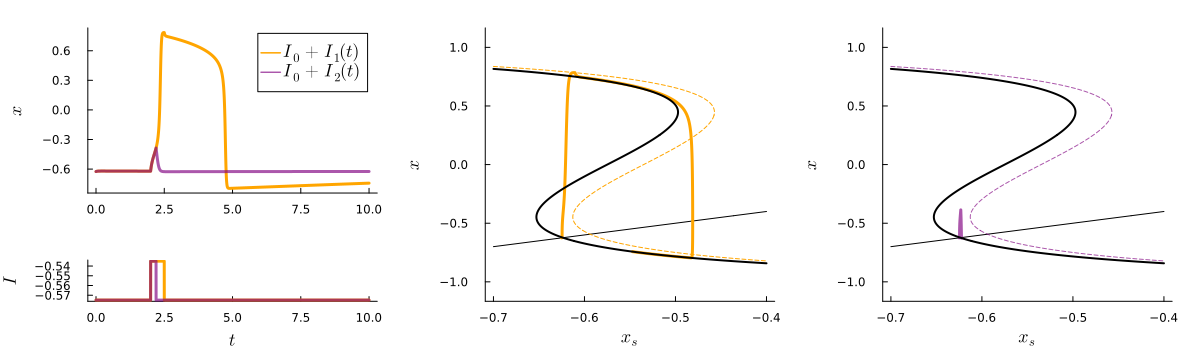

In [291]:
gr(legendfontsize=12,labelfontsize=12)

xsvec=range(-0.7,-0.4,length=1000)
xs_null(xs,x) = x - xs
p1=contour(xsvec,xvec,xs_null,levels=[0],lc=:black,lw=1,colorbar=false)
plot!(sol1[2,:],sol1[1,:],lc=:orange,lw=3,label="")
x_null_xs(xs,x) = -x+S(k*x+barI0-xs)
contour!(xsvec,xvec,x_null_xs,levels=[0],lc=:black,lw=2)
x_null_xs(xs,x) = -x+S(k*x+barI0-xs+I1(2.1))
contour!(xsvec,xvec,x_null_xs,levels=[0],lc=:orange,ls=:dash)
plot!(grid=false,xlabel=L"x_s",ylabel=L"x")

xs_null(xs,x) = x - xs
p2=contour(xsvec,xvec,xs_null,levels=[0],lc=:black,lw=1,colorbar=false)
plot!(sol2[2,:],sol2[1,:],lc=:purple,lw=3,label="",alpha=0.66)
x_null_xs(xs,x) = -x+S(k*x+barI0-xs)
contour!(xsvec,xvec,x_null_xs,levels=[0],lc=:black,lw=2)
x_null_xs(xs,x) = -x+S(k*x+barI0-xs+I2(2.1))
contour!(xsvec,xvec,x_null_xs,levels=[0],lc=:purple,alpha=0.66,ls=:dash)
plot!(grid=false,xlabel=L"x_s",ylabel=L"x")

p3=plot(sol1.t,sol1[1,:],lc=:orange,lw=3,label=L"I_0+I_1(t)")
plot!(sol2.t,sol2[1,:],lc=:purple,lw=3,label=L"I_0+I_2(t)",alpha=0.66)
plot!(grid=false,ylabel=L"x")

p4=plot(sol1.t,Iin1.(sol1.t),lw=3,lc=:orange,label=L"I_0+I_1(t)")
plot!(sol2.t,Iin2.(sol2.t),lw=3,lc=:purple,label=L"I_0+I_2(t)",alpha=0.66)
plot!(xlabel=L"t",ylabel=L"I",grid=false,legend=false)

l= @layout[
    a{0.8h}
    b{0.2h}
]

p5=plot(p3,p4,layout=l,margin=10px)

plot(p5,p1,p2,layout=(1,3),size=(1200,350),margin=20px)




In [292]:
savefig("1o_excitability.pdf")

**Remark:** the slow negative feedback could be coming from other nodes (e.g., in other brain areas), and could also be activated only upon accomplishment of a task. The resulting nonlinear dynamics would be more complicated, but the overall principle would remain the same.